In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [9]:
df = pd.read_csv('/content/agaricus-lepiota.csv')
df.head(2)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


Index(['e', 'p'], dtype='object') [4208 3915]


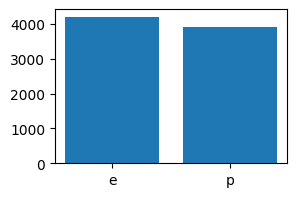

In [21]:
y = df['p'].value_counts().values
x = df['p'].value_counts().index
print(x,y)

plt.figure(figsize=(3,2))
plt.bar(x,y)
plt.show()

In [38]:
X=df.drop('p', axis=1)
y=df['p']

X=pd.get_dummies(X)
y=df['p'].replace({'e':0,'p':1})

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [40]:
# Modelling
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [41]:
# Prediction
yp_train = dt.predict(X_train)
yp_test = dt.predict(X_test)

In [46]:
# Evalution
from sklearn.metrics import accuracy_score
y_train_accuracy = accuracy_score(yp_train,y_train)
y_test_accuracy  = accuracy_score(yp_test,y_test)
print('y_train_accuracy : ',y_train_accuracy)
print('y_test_accuracy : ',y_test_accuracy)

from sklearn.model_selection import cross_val_score
print("Cross validation : " ,cross_val_score(dt, X,y).mean())

y_train_accuracy :  1.0
y_test_accuracy :  1.0
Cross validation :  0.944089124668435


<bound method IndexOpsMixin.tolist of Index(['x_b', 'x_c', 'x_f', 'x_k', 'x_s', 'x_x', 's_f', 's_g', 's_s', 's_y',
       ...
       's.3_s', 's.3_v', 's.3_y', 'u_d', 'u_g', 'u_l', 'u_m', 'u_p', 'u_u',
       'u_w'],
      dtype='object', length=117)>

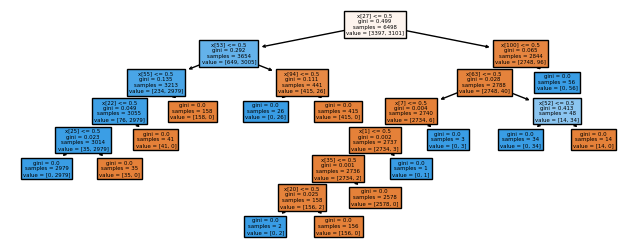

In [57]:
# Tree plotting
from sklearn.tree import plot_tree
plt.figure(figsize=(8,3), dpi=100)

plot_tree(dt, filled=True)
plt.show()

In [81]:
#select best hyperparameter
from sklearn.model_selection import GridSearchCV
#model
estimator = DecisionTreeClassifier(random_state=0)
#Parametr
param_grid = {'criterion':['gini', 'entropy'],'max_depth':list(range(1,11))}
grid = GridSearchCV(estimator,param_grid, scoring = 'accuracy',cv=5)
grid.fit(X, y)

# Selection
print('grid.best_estimator_ : ',grid.best_estimator_)
print('grid.best_param_ : ',grid.best_params_)

grid.best_estimator_ :  DecisionTreeClassifier(max_depth=7, random_state=0)
grid.best_param_ :  {'criterion': 'gini', 'max_depth': 7}


In [82]:
fet_imp = pd.DataFrame(grid.best_estimator_.feature_importances_,index=X_train.columns,columns=['Feature Importance'])
fet_imp =fet_imp[fet_imp['Feature Importance']>0]
fet_imp
print(fet_imp)
imp_featurs=fet_imp.index.to_list()
print(imp_featurs)

       Feature Importance
x_c              0.000492
s_g              0.001965
p.1_a            0.023369
p.1_l            0.022787
p.1_n            0.617063
n.1_n            0.000021
e.1_c            0.177297
e.1_r            0.085743
s.2_y            0.013768
w_w              0.016584
k.1_r            0.033817
s.3_c            0.001456
s.3_y            0.005635
['x_c', 's_g', 'p.1_a', 'p.1_l', 'p.1_n', 'n.1_n', 'e.1_c', 'e.1_r', 's.2_y', 'w_w', 'k.1_r', 's.3_c', 's.3_y']


In [83]:
from sklearn.model_selection import train_test_split
# Extract inpute with important featurs
X_imp = X[imp_featurs]

#train test split
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size=0.2,random_state=6)

#model with best parameter
f_model = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0)
f_model.fit(X_train, y_train)

ypred_train = f_model.predict(X_train)
ypred_test = f_model.predict(X_test)

#Evaluation
print("Trian Accuracy : ", accuracy_score(ypred_train,y_train))
print("Test Accuracy : ", accuracy_score(ypred_test,y_test))
print("Cross Validation Score : ", cross_val_score(f_model, X_imp,y,cv=5).mean())


Trian Accuracy :  1.0
Test Accuracy :  1.0
Cross Validation Score :  0.9980295566502463


# 2. Ramdom Forest Regression

In [89]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=10)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [98]:
# Prediction
ypp_train =rfr.predict(X_train)
ypp_test =rfr.predict(X_test)
# Evalution
from sklearn.metrics import accuracy_score
''' # Problem no 01
accuracy_score(ypp_train,y_train)
accuracy_score(ypp_test,y_test)
print('y_train_accuracy : ')
print('y_test_accuracy : ') '''

from sklearn.model_selection import cross_val_score
print("Cross validation : " ,cross_val_score(rfr, X,y).mean())

Cross validation :  0.9846602517532291


In [105]:
#select best hyperparameter
from sklearn.model_selection import GridSearchCV
#model
estimator = RandomForestRegressor(random_state=0)
#Parametr
param_grid = {'n_estimators':list(range(1,20))}
grid = GridSearchCV(estimator,param_grid, scoring = 'accuracy',cv=5)
grid.fit(X, y)

# Selection
print('grid.best_estimators_ : ',grid.best_estimator_)
print('grid.best_param_ : ',grid.best_params_)

grid.best_estimators_ :  RandomForestRegressor(n_estimators=1, random_state=0)
grid.best_param_ :  {'n_estimators': 1}


In [116]:
feat01= pd.DataFrame(data = grid.best_estimator_.feature_importances_,index=X.columns, columns=['Best_selection'])
imp_feat01 =feat01[feat01['Best_selection']>0]
imp_feat01.head(2)

,Best_selection
x_c,0.000982
x_k,0.000020


In [125]:
from sklearn.ensemble import RandomForestRegressor
rfr01 = RandomForestRegressor(n_estimators= 1, random_state=10)
rfr01.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1, random_state=10)

In [126]:
# Prediction
ypp_train =rfr01.predict(X_train)
ypp_test =rfr01.predict(X_test)
# Evalution
from sklearn.metrics import accuracy_score
 # Problem no 01
accuracy_score(ypp_train,y_train)
accuracy_score(ypp_test,y_test)
print('y_train_accuracy : ',accuracy_score(ypp_train,y_train))
print('y_test_accuracy : ',accuracy_score(ypp_test,y_test))

from sklearn.model_selection import cross_val_score
print("Cross validation : " ,cross_val_score(rfr, X,y).mean())

y_train_accuracy :  1.0
y_test_accuracy :  1.0
Cross validation :  0.9707500542980194


In [150]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [167]:
from sklearn.model_selection import GridSearchCV

#model and estimator 01
from sklearn.ensemble import AdaBoostClassifier
estimator_ab = AdaBoostClassifier()
estimator_gb = GradientBoostingClassifier()

#parameter grid
param_grid_ab = {'n_estimators':list(range(1,20))}
grid_ab = GridSearchCV(estimator_ab,param_grid_ab, cv=5, scoring='accuracy')
grid_ab.fit(X, y)
grid_ab.best_params_
print("ad : ",grid_ab.best_params_)

print("-"*100)
param_grid_gb = {'n_estimators':[1,11,20],'learning_rate':[0.5,0.6,0.7]}
grid_gb = GridSearchCV(estimator_gb,param_grid_gb, cv=5, scoring='accuracy')
grid_gb.fit(X, y)
grid_gb.best_params_
print("gd : ",grid_gb.best_params_)


ad :  {'n_estimators': 12}
----------------------------------------------------------------------------------------------------
gd :  {'learning_rate': 0.6, 'n_estimators': 11}


In [156]:
# Adaboost best parameter

feats_ab = pd.DataFrame(data=grid_ab.best_estimator_.feature_importances_,index=X.columns, columns=['Ab_imp_para'])
imp_feat_ab = feats_ab[feats_ab['Ab_imp_para']>0].index.to_list()
imp_feat_ab
print(imp_feat_ab)
# Gredientboost best parameter

feats_gb = pd.DataFrame(data=grid_gb.best_estimator_.feature_importances_,index=X.columns, columns=['gb_imp_para'])
imp_feat_gb = feats_gb[feats_gb['gb_imp_para']>0].index.to_list()
imp_feat_gb
print(imp_feat_gb)


['p.1_f', 'p.1_n', 'p.1_p', 'n.1_b', 'n.1_n', 'k_b', 'e_e', 's.1_k', 'p.3_p', 'k.1_r', 's.3_v']
['p.1_f', 'p.1_n', 'p.1_p', 'n.1_b', 'k_b', 'e_t', 's.1_k', 'p.3_p', 'k.1_r', 's.3_v']


In [148]:
#adaboost
from sklearn.model_selection import train_test_split
# Extract inpute with important featurs
Ximp_ab=X[imp_feat_ab]

#train test split
X_train,X_test,y_train,y_test = train_test_split(Ximp_ab,y,test_size=0.2,random_state=6)

#model with best parameter
f01_model = AdaBoostClassifier(n_estimators=12)
f01_model.fit(X_train, y_train)

ypred_train = f01_model.predict(X_train)
ypred_test = f01_model.predict(X_test)

#Evaluation
print("Trian Accuracy : ", accuracy_score(ypred_train,y_train))
print("Test Accuracy : ", accuracy_score(ypred_test,y_test))
print("Cross Validation Score : ", cross_val_score(f01_model, X_imp,y,cv=5).mean())


Trian Accuracy :  0.9984610649430594
Test Accuracy :  0.9963076923076923
Cross Validation Score :  0.9971680181887079


In [169]:
#gredienr boost
from sklearn.model_selection import train_test_split
# Extract inpute with important featurs
Ximp_gb=X[imp_feat_gb]

#train test split
X_train,X_test,y_train,y_test = train_test_split(Ximp_gb,y,test_size=0.2,random_state=6)

#model with best parameter
f02_model = GradientBoostingClassifier(n_estimators=11,learning_rate= 0.6)
f02_model.fit(X_train, y_train)

ypred_train = f02_model.predict(X_train)
ypred_test = f02_model.predict(X_test)

#Evaluation
print("Trian Accuracy : ", accuracy_score(ypred_train,y_train))
print("Test Accuracy : ", accuracy_score(ypred_test,y_test))
print("Cross Validation Score : ", cross_val_score(f02_model, X_imp,y,cv=5).mean())


Trian Accuracy :  0.9984610649430594
Test Accuracy :  0.9963076923076923
Cross Validation Score :  0.9980295566502463
